# Final Project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
sns.set()
import pandas as pd
data = pd.read_csv("C://Users/Summer/Downloads/2020.csv")
data.head()

,country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,1,30.100000,71.500000,64.200000,92.500000,0.620289,0.605456,0.236584,0.01257,59.480777,...,32.600000,80.20000,59.200000,18.200000,66.900000,48.400000,33.400000,8.800000,34.800000,25.702697
1,2,75.370000,100.000000,100.000000,100.000000,0.620289,0.605456,0.236584,0.01257,95.596611,...,1.222348,1.15303,0.741667,0.423106,0.827273,0.806061,0.606061,0.203409,0.851515,30.300000
2,3,92.700000,99.336708,98.687683,99.605331,0.620289,0.605456,0.236584,0.01257,99.267097,...,1.222348,1.15303,0.741667,0.423106,0.827273,0.806061,0.606061,0.203409,0.851515,44.800000
3,4,56.758566,81.825872,71.668304,90.699656,0.620289,0.605456,0.236584,0.01257,59.480777,...,1.222348,1.15303,0.741667,0.423106,0.827273,0.806061,0.606061,0.203409,0.851515,25.702697
4,5,100.000000,100.000000,100.000000,100.000000,0.620289,0.605456,0.236584,0.01257,59.480777,...,1.222348,1.15303,0.741667,0.423106,0.827273,0.806061,0.606061,0.203409,0.851515,25.702697


### Classification

In [9]:
X=data.drop('country',axis=1)
y=data.country
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

Accuracy of Logistic regression classifier on training set: 0.95


In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.07


In [15]:
from sklearn.ensemble import RandomForestClassifier
fclf=RandomForestClassifier(max_depth=20).fit(X_train,y_train)
print('Accuracy of Decision Forest classifier on training set: {:.2f}'
     .format(fclf.score(X_train, y_train)))

Accuracy of Decision Forest classifier on training set: 0.70


In [17]:
#10 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 0.11


In [19]:

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs')
mlpc.fit(X_train,y_train)
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(mlpc.score(X_train, y_train)))

Accuracy of NN classifier on training set: 0.02


In [20]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

Accuracy of SVC classifier on training set: 1.00


## Regression-Preprocessing

In [51]:
data.dtypes
print(data.shape)

(264, 1395)


In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, Y_data, random_state=9)
Xcolnames = list(X_scaled)

### K Nearest Neighbors

In [92]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))
scores = cross_val_score(reg, X_data, Y_data, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Test set R^2: 0.91
Average cross-validation score: 0.90


### Lasso

In [93]:
lasso = Lasso().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
scores = cross_val_score(lasso, X_data, Y_data, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Training set score: 1.00
Test set score: -0.73
Number of features used: 1387
Average cross-validation score: -0.32


### Decision Tree Regressor

In [95]:
tree = DecisionTreeRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(tree.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(tree.score(Xtest, ytest)))
scores = cross_val_score(tree, X_data, Y_data, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Training set score: 1.00
Test set score: 0.70
Average cross-validation score: 0.88


### Ada Boost Regressor

In [96]:
abtr = AdaBoostRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(abtr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(abtr.score(Xtest, ytest)))
scores = cross_val_score(abtr, X_data, Y_data, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Training set score: 1.00
Test set score: 0.98
Average cross-validation score: 0.87


### Random Forest Regressor

In [97]:
rfr = RandomForestRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(rfr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(rfr.score(Xtest, ytest)))
scores = cross_val_score(rfr, X_data, Y_data, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Training set score: 0.99
Test set score: 0.99
Average cross-validation score: 0.90


### Linear Regression

In [101]:
lr = LinearRegression().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lr.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Training set score: 1.00
Test set score: 0.99
Number of features used: 1394


## Linear Regression seems to be the best model in regression

# *****

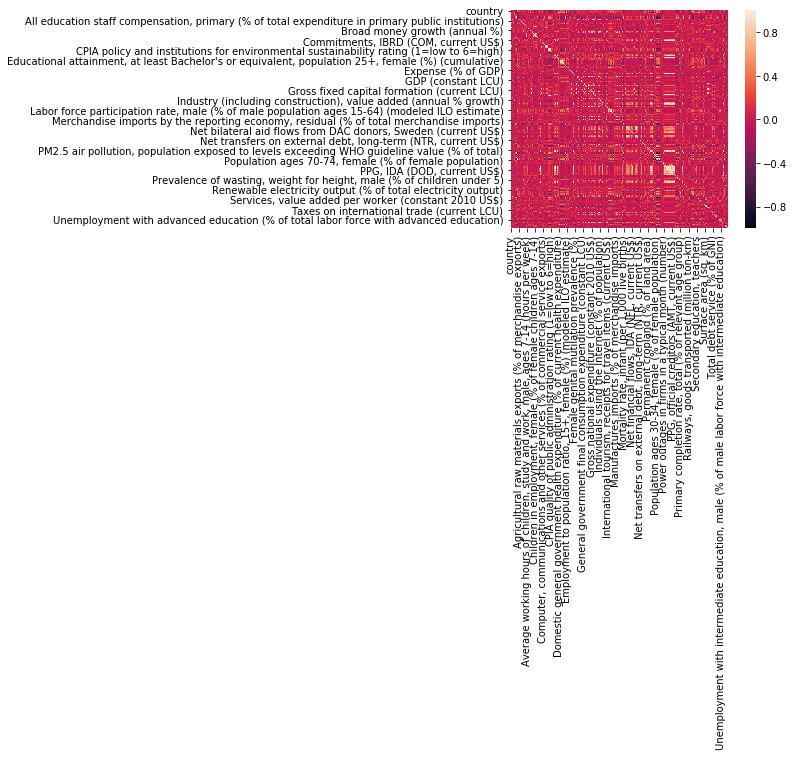

In [87]:
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

# Principle Component Analysis

In [53]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X_data)
X_scaled = scaler.transform(X_data)

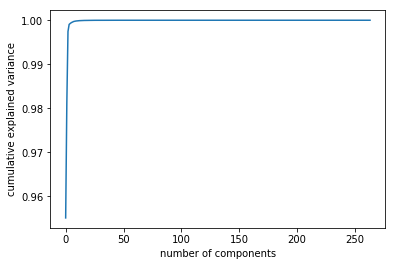

In [54]:
pca = PCA().fit(X_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

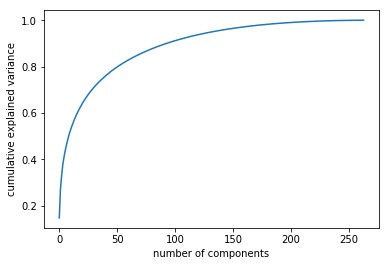

In [55]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [56]:
pca = PCA(n_components=200)
pca.fit(X_scaled)
X_scorecard_200PCA = pca.transform(X_scaled)

# Find the optimal number of clusters

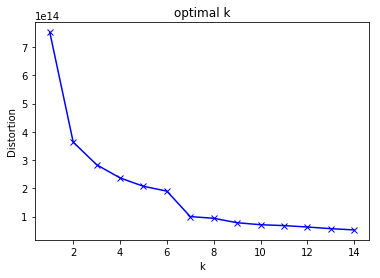

In [57]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('optimal k')
plt.show()

The optimal number of clusters is 2


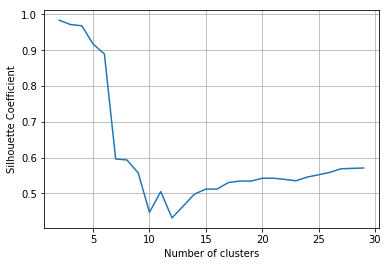

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics
k_range = range(2, 30)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(data)
    scores.append(metrics.silhouette_score(data, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print ("The optimal number of clusters is %d" % optimal_k)
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# K-means clustering

In [59]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data, 2)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

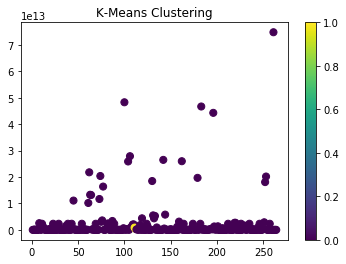

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['country'],data['GDP'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)

# Hierarchical clustering

In [65]:
from sklearn.cluster import AgglomerativeClustering
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data, 2)
agglomerative = pd.DataFrame(clust_labels1)
data.insert((data.shape[1]),'agglomerative',agglomerative)

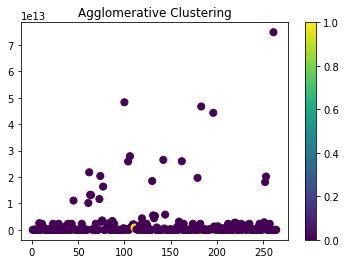

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['country'],data['GDP'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
plt.colorbar(scatter)

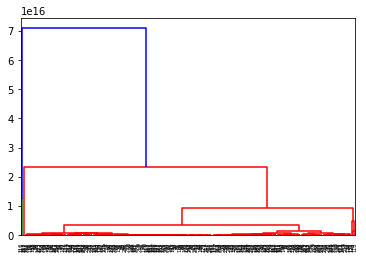

In [67]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Z = linkage(data, 'ward')
dn = dendrogram(Z)

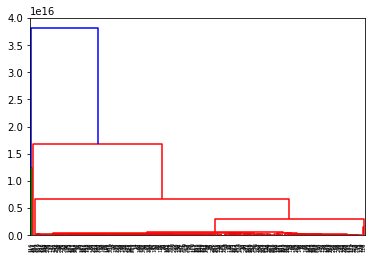

In [68]:
Z = linkage(data, 'complete')
dn = dendrogram(Z)

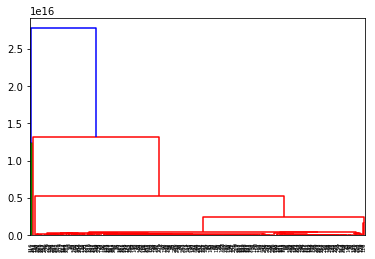

In [69]:
Z = linkage(data, 'weighted')
dn = dendrogram(Z)

# Affinity Propagation

In [72]:
from sklearn.cluster import AffinityPropagation
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(data)
affinity = pd.DataFrame(clust_labels2)
data.insert((data.shape[1]),'affinity',affinity)

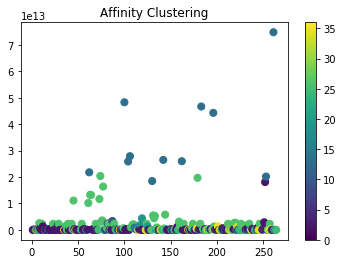

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['country'],data['GDP'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
plt.colorbar(scatter)

# Time Series

In [74]:
import pandas as pd
df = pd.read_csv("C://Users/Summer/Downloads/2019.csv")
df.head(10)

,Year,GDP
0,1960,5464.0
1,1961,5668.0
2,1962,6092.0
3,1963,6431.0
4,1964,6907.0
5,1965,7490.0
6,1966,8201.0
7,1967,8671.0
8,1968,9486.0
9,1969,10260.0


In [78]:
train=df[0:46] 
test=df[45:]
from datetime import datetime
df.year = pd.to_datetime(df.Year)

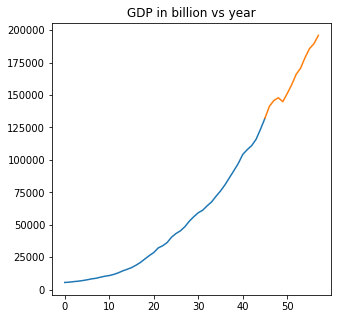

In [79]:
#Plotting data
train.GDP.plot(figsize=(5,5), title= 'GDP in billion vs year')
test.GDP.plot(figsize=(5,5), title= 'GDP in billion vs year')
plt.show()

# Simple Average

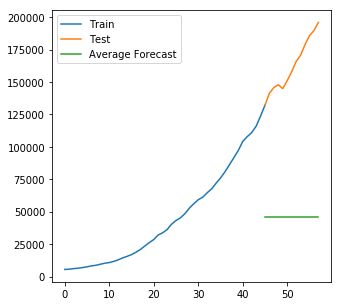

In [80]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['GDP'].mean()
plt.figure(figsize=(5,5))
plt.plot(train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [81]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test.GDP, y_hat_avg.avg_forecast))
print(rms)

117913.16888043906


# Simple Exponential Smoothing

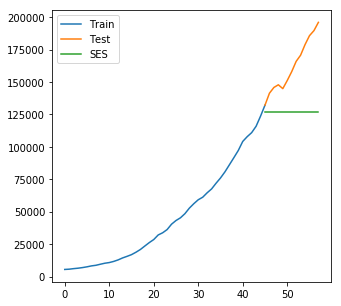

In [82]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['GDP'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(5,5))
plt.plot(train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [83]:
rms = sqrt(mean_squared_error(test.GDP, y_hat_avg.SES))
print(rms)

40285.45776685907


# Holt’s Linear Trend method

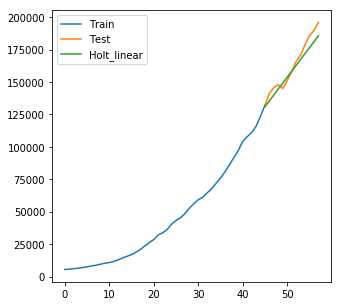

In [84]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['GDP'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(5,5))
plt.plot(train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [85]:
rms = sqrt(mean_squared_error(test.GDP, y_hat_avg.Holt_linear))
print(rms)

5808.804948629779


# Holt-Winters Method

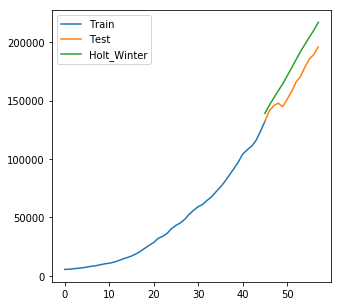

In [86]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['GDP']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(5,5))
plt.plot( train['GDP'], label='Train')
plt.plot(test['GDP'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [220]:
rms = sqrt(mean_squared_error(test.GDP, y_hat_avg.Holt_Winter))
print(rms)

17200.89175618352
